# __Education Project__

## __Introduction__

#### For this project, we are looking to use the data science methodology to answer the question of whether school performance is predicted by socioeconomic factors in the United States. In this case, we are going to compare ACT Scores in school disctricts to multiple socioeconomic factors. We are also going to add a factor that is based on _% of private school entrollment in an area_ as well. 

## __Import Necessary Libraries for Analysi and Importing Datasets__

#### Our first step is to import our necessary libraries into our notebook, which consist of 
#### -__pandas (pd)__ for our data analysis functions, 
#### -__numpy(np)__ for additional mathematical tools, 
#### -__matplotlib.pyplot(plt)__ for our graphs, 
#### -__seaborn (sns)__, which acts as an additional data visualization project built on matplotlib (we will also set our grid for sns to be white at this stage).

In [2]:
# Import pands, numpy, and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# seaborn is a data visualization library built on matplotlib
import seaborn as sns
#set the plotting style
sns.set_style("whitegrid")

import wget as wget

# Model preprocessing
from sklearn.preprocessing import StandardScaler

#Modelling
import statsmodels.formula.api as smf
import statsmodels.api as sm

# Model metrics and analysis
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.stats.anova import anova_lm

#### Now that we have successfully imported our libraries and graphics tools, we can now being importing our datasets from EdGap and the National Center for Education Statistics.

## Import EdGap & National Center for Education Statistics Dataframes & Other Datasets

#### We will import our data using the __pandas__ function __pd.read_excel()__, and we will import our data from our Github repository for [EdGap]() and for [Pittsburgh](https://raw.githubusercontent.com/CameronMangione/weather/refs/heads/main/data/pittsburgh_rain.csv').

#### Note that for these functions to work properly, we needed to import the raw files, which are linked above.

#### __Brian's method in the lecture did not work so I should meet with him in office hours tomorrow to go over this process.__

In [3]:
edgap = pd.read_excel('https://raw.githubusercontent.com/CameronMangione/education/main/data/EdGap_data.xlsx',
dtype = {'NCESSCH School ID': object})

/opt/anaconda3/lib/python3.13/site-packages/openpyxl/worksheet/_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


In [17]:
url = "https://www.dropbox.com/scl/fi/fkafjk8902sq8ptxh94r2/ccd_sch_029_1617_w_1a_11212017.csv?rlkey=gucrdz5f6e38bezz2y3yalxbw&e=1&dl=0"
filename = wget.download(url, out="ccd_sch_029_1617_w_1a_11212017.csv")
print(f"Downloaded file saved as: {filename}")

Downloaded file saved as: ccd_sch_029_1617_w_1a_11212017.csv


In [21]:
filename

'ccd_sch_029_1617_w_1a_11212017.csv'

In [30]:
school_information = pd.read_csv("https://raw.githubusercontent.com/CameronMangione/education/main/data/ccd_sch_029_1617_w_1a_11212017.csv", encoding="unicode_escape", dtype = {'NCESSCH': object})

In [32]:
school_district = pd.read_csv("https://raw.githubusercontent.com/CameronMangione/education/main/data/School_District_Characteristics_-_Current.csv", encoding="unicode_escape")

In [36]:
public_school = pd.read_csv("https://raw.githubusercontent.com/CameronMangione/education/main/data/Public_School_Characteristics_2022-23.csv", encoding="unicode escape")

/var/folders/j8/rt19hmcs2rx__jyns29v73q40000gn/T/ipykernel_14526/3129943478.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  public_school = pd.read_csv("https://raw.githubusercontent.com/CameronMangione/education/main/data/Public_School_Characteristics_2022-23.csv", encoding="unicode escape")


In [ ]:
df = pd.read_csv(

#### Need to check on how to do the method that Brian showed in the video, but everything is at least imported now.

## Head and Info Methods for Checking the Data

### Head Data Checks

In [31]:
school_information.head()

SCHOOL_YEAR STATENAME  ST                          SCH_NAME  \
0   2016-2017   ALABAMA  AL  Sequoyah Sch - Chalkville Campus   
1   2016-2017   ALABAMA  AL                             Camps   
2   2016-2017   ALABAMA  AL                           Det Ctr   
3   2016-2017   ALABAMA  AL     Wallace Sch - Mt Meigs Campus   
4   2016-2017   ALABAMA  AL         McNeel Sch - Vacca Campus   

                 LEA_NAME ST_LEAID   LEAID     ST_SCHID      NCESSCH   SCHID  \
0  Alabama Youth Services   AL-210  100002  AL-210-0020  10000200277  100277   
1  Alabama Youth Services   AL-210  100002  AL-210-0050  10000201667  101667   
2  Alabama Youth Services   AL-210  100002  AL-210-0060  10000201670  101670   
3  Alabama Youth Services   AL-210  100002  AL-210-0030  10000201705  101705   
4  Alabama Youth Services   AL-210  100002  AL-210-0040  10000201706  101706   

   ...   MZIP                     LSTREET1        LCITY  LSTATE   LZIP  \
0  ...  35220  1000 Industrial School Road   Birmingham      AL  35220   
1  ...  36057           1601 County Rd. 57   Prattville      AL  36067   
2  ...  36057       2109 Bashi Rd Bldg 509  Thomasville      AL  36784   
3  ...  36057  1000 Industrial School Road  Mount Meigs      AL  36057   
4  ...  35206            8950 Roebuck Blvd   Birmingham      AL  35206   

  UPDATED_STATUS_TEXT EFFECTIVE_DATE       SCH_TYPE_TEXT SCH_TYPE LEVEL  
0                Open         3/3/10  Alternative School        4  High  
1                Open         3/3/10  Alternative School        4  High  
2                Open         3/3/10  Alternative School        4  High  
3                Open         3/3/10  Alternative School        4  High  
4                Open         3/3/10  Alternative School        4  High  

[5 rows x 23 columns]

In [33]:
school_district.head()

ï»¿OBJECTID   SURVYEAR STATENAME    LEAID ST_LEAID  \
0            1  2022-2023   FLORIDA  1200180    FL-06   
1            2  2022-2023   FLORIDA  1200240    FL-08   
2            3  2022-2023   FLORIDA  1200330    FL-11   
3            4  2022-2023   FLORIDA  1200390    FL-13   
4            5  2022-2023   FLORIDA  1200420    FL-14   

                           LEA_NAME               LSTREET1 LSTREET2  \
0    Broward County School District   600 SE 3RD AVE FL 10      NaN   
1  Charlotte County School District     1445 EDUCATION WAY      NaN   
2    Collier County School District       5775 OSCEOLA TRL      NaN   
3       Dade County School District  1450 NE 2ND AVE # 912      NaN   
4     DeSoto County School District       530 LASOLONA AVE      NaN   

             LCITY LSTATE  ...    TOTTCH STUTERATIO          LOCALE_TEXT  \
0  FORT LAUDERDALE     FL  ...  12532.89      20.33     21-Suburb: Large   
1   PORT CHARLOTTE     FL  ...    936.00      17.99  22-Suburb: Mid-size   
2           NAPLES     FL  ...   2790.99      17.23     21-Suburb: Large   
3            MIAMI     FL  ...  16606.00      20.12     21-Suburb: Large   
4          ARCADIA     FL  ...    241.00      19.01     32-Town: Distant   

              CONAME   COID          PHONE        Lat       Long  \
0     Broward County  12011  (754)321-0000  26.114594 -80.139472   
1   Charlotte County  12015  (941)255-0808  27.005501 -82.145160   
2     Collier County  12021  (239)377-0001  26.220768 -81.758198   
3  Miami-Dade County  12086  (305)995-1000  25.788930 -80.190942   
4      DeSoto County  12027  (863)494-4222  27.221257 -81.848946   

    Shape__Area  Shape__Length  
0  3.944242e+09   3.984587e+05  
1  2.312790e+09   9.561971e+05  
2  6.577048e+09   1.347319e+06  
3  6.348318e+09   9.861156e+05  
4  2.100186e+09   1.871353e+05  

[5 rows x 29 columns]

In [35]:
public_school.head()

ï»¿X        Y  OBJECTID      NCESSCH   SURVYEAR STABR   LEAID  \
0 -86.206200  34.2602         1  10000500870  2022-2023    AL  100005   
1 -86.204900  34.2622         2  10000500871  2022-2023    AL  100005   
2 -86.220100  34.2733         3  10000500879  2022-2023    AL  100005   
3 -86.221806  34.2527         4  10000500889  2022-2023    AL  100005   
4 -86.193300  34.2898         5  10000501616  2022-2023    AL  100005   

  ST_LEAID          LEA_NAME                           SCH_NAME  ...  HIALF  \
0   AL-101  Albertville City          Albertville Middle School  ...  251.0   
1   AL-101  Albertville City            Albertville High School  ...  468.0   
2   AL-101  Albertville City    Albertville Intermediate School  ...  241.0   
3   AL-101  Albertville City      Albertville Elementary School  ...  236.0   
4   AL-101  Albertville City  Albertville Kindergarten and PreK  ...  152.0   

      HI TRALM TRALF    TR  WHALM  WHALF     WH   LATCOD     LONCOD  
0  502.0  17.0  15.0  32.0  168.0  147.0  315.0  34.2602 -86.206200  
1  958.0  26.0  19.0  45.0  325.0  316.0  641.0  34.2622 -86.204900  
2  504.0   7.0   6.0  13.0  154.0  144.0  298.0  34.2733 -86.220100  
3  497.0  11.0  16.0  27.0  168.0  136.0  304.0  34.2527 -86.221806  
4  319.0   4.0   4.0   8.0  104.0  120.0  224.0  34.2898 -86.193300  

[5 rows x 77 columns]

In [37]:
edgap.head()

NCESSCH School ID  CT Unemployment Rate  CT Pct Adults with College Degree  \
0      100001600143              0.117962                           0.445283   
1      100008000024              0.063984                           0.662765   
2      100008000225              0.056460                           0.701864   
3      100017000029              0.044739                           0.692062   
4      100018000040              0.077014                           0.640060   

   CT Pct Childre In Married Couple Family  CT Median Household Income  \
0                                 0.346495                     42820.0   
1                                 0.767619                     89320.0   
2                                 0.713090                     84140.0   
3                                 0.641283                     56500.0   
4                                 0.834402                     54015.0   

   School ACT average (or equivalent if SAT score)  \
0                                        20.433455   
1                                        19.498168   
2                                        19.554335   
3                                        17.737485   
4                                        18.245421   

   School Pct Free and Reduced Lunch  
0                           0.066901  
1                           0.112412  
2                           0.096816  
3                           0.296960  
4                           0.262641

## __Info Data Checks__

In [39]:
edgap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7986 entries, 0 to 7985
Data columns (total 7 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   NCESSCH School ID                                7986 non-null   object 
 1   CT Unemployment Rate                             7972 non-null   float64
 2   CT Pct Adults with College Degree                7973 non-null   float64
 3   CT Pct Childre In Married Couple Family          7961 non-null   float64
 4   CT Median Household Income                       7966 non-null   float64
 5   School ACT average (or equivalent if SAT score)  7986 non-null   float64
 6   School Pct Free and Reduced Lunch                7986 non-null   float64
dtypes: float64(6), object(1)
memory usage: 436.9+ KB


In [40]:
public_school.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101390 entries, 0 to 101389
Data columns (total 77 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ï»¿X              101390 non-null  float64
 1   Y                 101390 non-null  float64
 2   OBJECTID          101390 non-null  int64  
 3   NCESSCH           101390 non-null  int64  
 4   SURVYEAR          101390 non-null  object 
 5   STABR             101390 non-null  object 
 6   LEAID             101390 non-null  int64  
 7   ST_LEAID          101390 non-null  object 
 8   LEA_NAME          101390 non-null  object 
 9   SCH_NAME          101390 non-null  object 
 10  LSTREET1          101389 non-null  object 
 11  LSTREET2          572 non-null     object 
 12  LCITY             101390 non-null  object 
 13  LSTATE            101390 non-null  object 
 14  LZIP              101390 non-null  int64  
 15  LZIP4             101390 non-null  object 
 16  PHONE             10

In [41]:
school_district.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13239 entries, 0 to 13238
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ï»¿OBJECTID     13239 non-null  int64  
 1   SURVYEAR        13239 non-null  object 
 2   STATENAME       13239 non-null  object 
 3   LEAID           13239 non-null  int64  
 4   ST_LEAID        13239 non-null  object 
 5   LEA_NAME        13239 non-null  object 
 6   LSTREET1        13239 non-null  object 
 7   LSTREET2        187 non-null    object 
 8   LCITY           13239 non-null  object 
 9   LSTATE          13239 non-null  object 
 10  LZIP            13239 non-null  int64  
 11  LZIP4           13239 non-null  object 
 12  LEA_TYPE_TEXT   13239 non-null  object 
 13  LEA_TYPE        13239 non-null  int64  
 14  GSLO            13239 non-null  object 
 15  GSHI            13239 non-null  object 
 16  SY_STATUS_TEXT  13239 non-null  object 
 17  SCH             13239 non-null 

In [42]:
school_information.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102181 entries, 0 to 102180
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   SCHOOL_YEAR          102181 non-null  object
 1   STATENAME            102181 non-null  object
 2   ST                   102181 non-null  object
 3   SCH_NAME             102181 non-null  object
 4   LEA_NAME             102181 non-null  object
 5   ST_LEAID             102181 non-null  object
 6   LEAID                102181 non-null  int64 
 7   ST_SCHID             102181 non-null  object
 8   NCESSCH              102181 non-null  object
 9   SCHID                102181 non-null  int64 
 10  MSTREET1             102181 non-null  object
 11  MCITY                102181 non-null  object
 12  MSTATE               102181 non-null  object
 13  MZIP                 102181 non-null  int64 
 14  LSTREET1             102181 non-null  object
 15  LCITY                102181 non-nu

#### The EdGap data is the smallest dataset by far, while the school information and public school datasets are much larger.

#### The School district report that I pulled had 13k+ data points, and still much small than the other two datasets.

#### Each dataset is tidy.

#### I converted the NCESSCH data in both to objects.

### edgap and both of the datasets that I have imported have missing data.

## __Data Suitability Checks__

### __Pairplots__

#### Make a pairplot to explore the relationship between two variables 

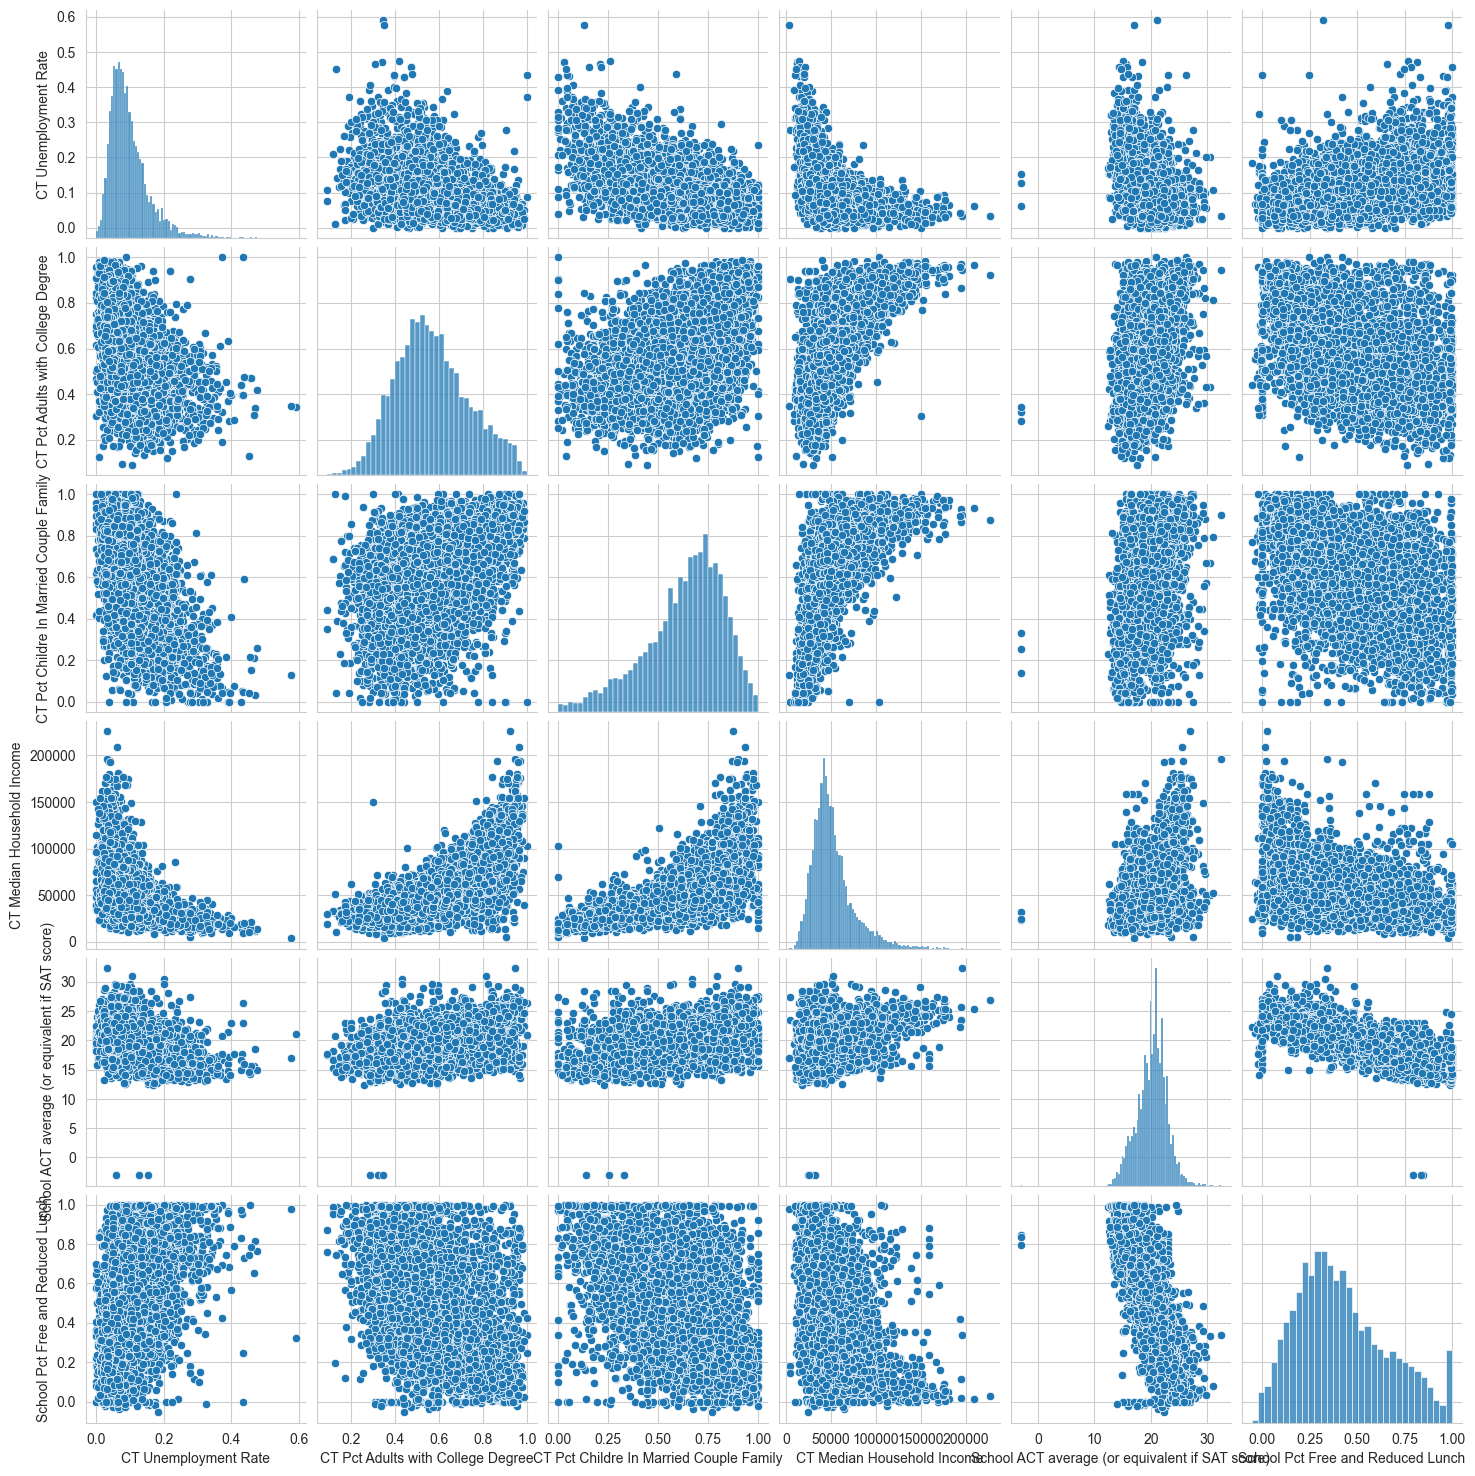

In [46]:
sns.pairplot(
    edgap.drop(columns="NCESSCH School ID"));

plt.show()

TypeError: step() missing 1 required positional argument: 'y'

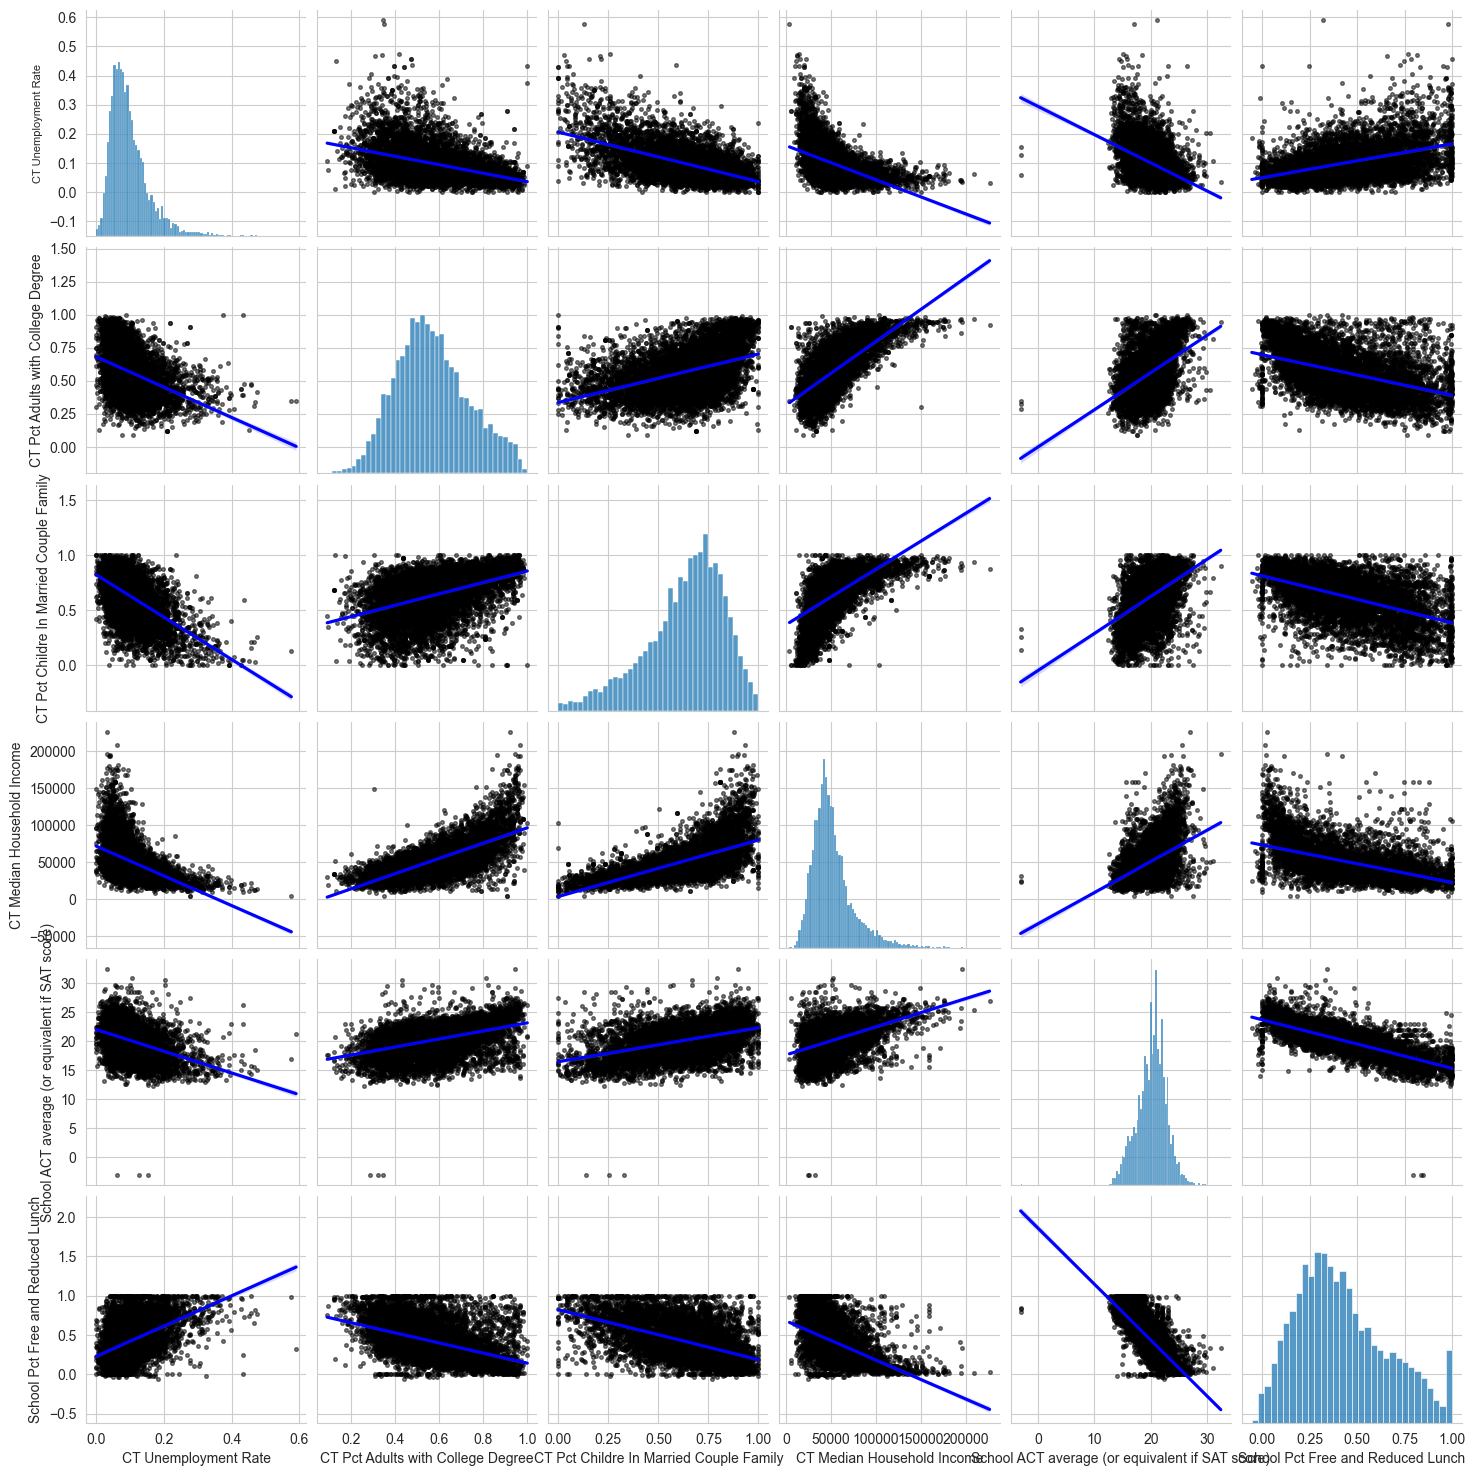

In [51]:
fig = sns.pairplot(
    edgap.drop(columns="NCESSCH School ID"),
    kind="reg",
    plot_kws={ 
        "line_kws": {"color": "blue"}, 
        "scatter_kws": {"alpha": 0.5, "color": "k", "s": 7},
    },
)

for ax in fig.axes.flat:
    if ax.get_label() == 'CT Median Household Income':
        ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0)) #Apply scientific notation
    ax.set_xlabel(ax.get_xlabel(), fontsize=8, rotation=30, ha='right') #X-axis label size and rotation
    ax.set_ylabel(ax.get_ylabel(), fontsize=8) #Y-axis label size

    # Rotate x-axis tick labels
    plt.step(ax.get_xticklabels(), rotation=30, ha='right')


plt.show()

TypeError: step() missing 1 required positional argument: 'y'

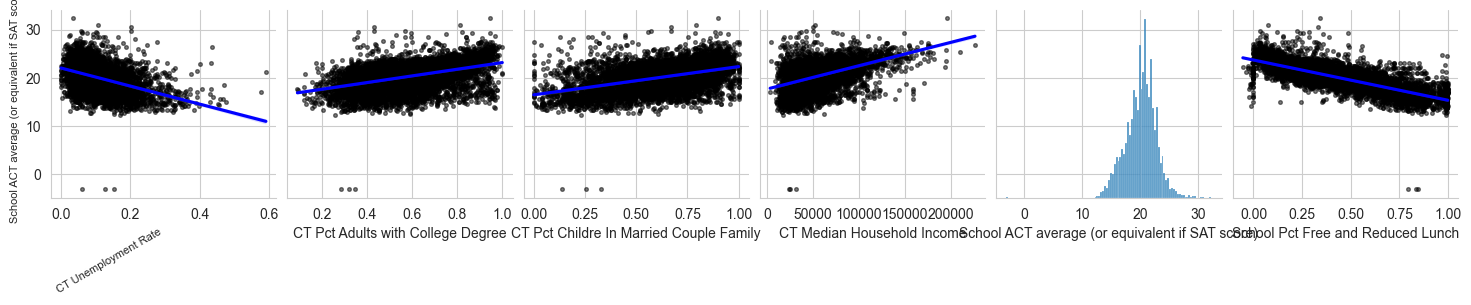

In [52]:
fig = sns.pairplot(
    edgap.drop(columns="NCESSCH School ID"),
    y_vars=['School ACT average (or equivalent if SAT score)'],
    kind="reg",
    plot_kws={ 
        "line_kws": {"color": "blue"}, 
        "scatter_kws": {"alpha": 0.5, "color": "k", "s": 7},
    },
)

for ax in fig.axes.flat:
    if ax.get_label() == 'CT Median Household Income':
        ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0)) #Apply scientific notation
    ax.set_xlabel(ax.get_xlabel(), fontsize=8, rotation=30, ha='right') #X-axis label size and rotation
    ax.set_ylabel(ax.get_ylabel(), fontsize=8) #Y-axis label size

    # Rotate x-axis tick labels
    plt.step(ax.get_xticklabels(), rotation=30, ha='right')


plt.show()

#### There appears to be a relationship between the socioeconomic variables and the ACT score.

#### There are some out-of-range ACT and percent lunch values that will need to be dealt with.

#### We should have confidence that it is worthwhile to spend time preparing the data for analysis.

## Data Preparation

### Select relevant subsets of the data

#### We only need the year, school identity, location, and school type information (SCHOOL_YEAR, NCESSSCH, LSTATE, LZIP, SCH_TYPE_TXT, LEVEL, CHARTER_TEXT)

In [56]:
school_information = school_information[['SCHOOL_YEAR', 'NCESSCH', 'LSTATE', 'LZIP', 'SCH_TYPE_TEXT', 'LEVEL']]

#### Charter Information Missing

In [58]:
school_information.head()

SCHOOL_YEAR      NCESSCH LSTATE   LZIP       SCH_TYPE_TEXT LEVEL
0   2016-2017  10000200277     AL  35220  Alternative School  High
1   2016-2017  10000201667     AL  36067  Alternative School  High
2   2016-2017  10000201670     AL  36784  Alternative School  High
3   2016-2017  10000201705     AL  36057  Alternative School  High
4   2016-2017  10000201706     AL  35206  Alternative School  High

### Rename Columns

#### We will rename the columns to follow best practices of style and being informative.

In [81]:
edgap = edgap.rename(
    columns={
        "NCESSCH School ID": "id",
        "CT Pct Adults with College Degree": "percent_college",
        "CT Unemployment Rate": "rate_unemployment",
        "CT Pct Childre In Married Couple Family": "percent_married",
        "CT Median Household Income": "median_income",
        "School ACT average (or equivalent if SAT score)": "average_act",
        "School Pct Free and Reduced Lunch": "percent_lunch",
    }
)

In [82]:
school_information = school_information.rename(
    columns={
        "SCHOOL_YEAR": "year",
        "NCESSCH": "id",
        "LSTATE": "state",
        "LZIP": "zip_code",
        "SCH_TYPE_TEXT": "school_type",
        "LEVEL": "school_level",
        "CHARTER_TEXT": "charter"
    }
)


#### 1. We selected a subset of columns of the school information data set.
#### 2. We renamed the columns for clarity and to follow formatting guidelines.
#### 3. We are ready to join the data frames.



## Join data frames

#### We want to join the DataFrames using the identity of the school as the key. The identity is given by the NCESSCH school identity. The value is an object in the EdGap data set and a float64 in the school information data set.

#### We will cast the id column in the school_information DataFrame as an object.


In [83]:
school_information['id'] = school_information['id'].astype('object')

In [84]:
school_information.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102181 entries, 0 to 102180
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   year          102181 non-null  object
 1   id            102181 non-null  object
 2   state         102181 non-null  object
 3   zip_code      102181 non-null  int64 
 4   school_type   102181 non-null  object
 5   school_level  102181 non-null  object
dtypes: int64(1), object(5)
memory usage: 4.7+ MB


In [65]:
edgap.head()

id  rate_unemployment  percent_college  percent_married  \
0  100001600143           0.117962         0.445283         0.346495   
1  100008000024           0.063984         0.662765         0.767619   
2  100008000225           0.056460         0.701864         0.713090   
3  100017000029           0.044739         0.692062         0.641283   
4  100018000040           0.077014         0.640060         0.834402   

   median_income  average_act  percent_lunch  
0        42820.0    20.433455       0.066901  
1        89320.0    19.498168       0.112412  
2        84140.0    19.554335       0.096816  
3        56500.0    17.737485       0.296960  
4        54015.0    18.245421       0.262641

In [66]:
school_information.head()

year           id state  zip_code         school_type school_level
0  2016-2017  10000200277    AL     35220  Alternative School         High
1  2016-2017  10000201667    AL     36067  Alternative School         High
2  2016-2017  10000201670    AL     36784  Alternative School         High
3  2016-2017  10000201705    AL     36057  Alternative School         High
4  2016-2017  10000201706    AL     35206  Alternative School         High

In [85]:
df = edgap.merge(
    school_information,
    how='left',
    on='id'
)

In [86]:
df.head()

id  rate_unemployment  percent_college  percent_married  \
0  100001600143           0.117962         0.445283         0.346495   
1  100008000024           0.063984         0.662765         0.767619   
2  100008000225           0.056460         0.701864         0.713090   
3  100017000029           0.044739         0.692062         0.641283   
4  100018000040           0.077014         0.640060         0.834402   

   median_income  average_act  percent_lunch year state  zip_code school_type  \
0        42820.0    20.433455       0.066901  NaN   NaN       NaN         NaN   
1        89320.0    19.498168       0.112412  NaN   NaN       NaN         NaN   
2        84140.0    19.554335       0.096816  NaN   NaN       NaN         NaN   
3        56500.0    17.737485       0.296960  NaN   NaN       NaN         NaN   
4        54015.0    18.245421       0.262641  NaN   NaN       NaN         NaN   

  school_level  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7986 entries, 0 to 7985
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 7986 non-null   object 
 1   rate_unemployment  7972 non-null   float64
 2   percent_college    7973 non-null   float64
 3   percent_married    7961 non-null   float64
 4   median_income      7966 non-null   float64
 5   average_act        7986 non-null   float64
 6   percent_lunch      7986 non-null   float64
 7   year               0 non-null      object 
 8   state              0 non-null      object 
 9   zip_code           0 non-null      float64
 10  school_type        0 non-null      object 
 11  school_level       0 non-null      object 
dtypes: float64(7), object(5)
memory usage: 748.8+ KB


#### We joined the data sets using the school id as the key.

#### We first cast the id as an object to have the same data type for the key in each data set.

#### We used a left join to keep all EdGap data.



## Quality Control

#### There are natural bounds for the numerical variables in the data set. Check the minimum and maximum values in each column.

#### We can use the describe() method to compute descriptive statistics

In [71]:
df.describe()

rate_unemployment  percent_college  percent_married  median_income  \
count        7972.000000      7973.000000      7961.000000    7966.000000   
mean            0.098730         0.568930         0.633440   52026.905222   
std             0.058959         0.165704         0.196764   24228.057079   
min             0.000000         0.091493         0.000000    3589.000000   
25%             0.058655         0.450828         0.523810   36597.250000   
50%             0.085649         0.554979         0.667594   46833.500000   
75%             0.123376         0.676571         0.777135   61369.250000   
max             0.590278         1.000000         1.000000  226181.000000   

       average_act  percent_lunch  zip_code  
count  7986.000000    7986.000000       0.0  
mean     20.181532       0.420651       NaN  
std       2.595201       0.239754       NaN  
min      -3.070818      -0.054545       NaN  
25%      18.600000       0.238501       NaN  
50%      20.400000       0.381570       NaN  
75%      21.910867       0.575447       NaN  
max      32.362637       0.998729       NaN

In [87]:
df.select_dtypes(include=['number']).agg(['min', 'max']).round(2)

rate_unemployment  percent_college  percent_married  median_income  \
min               0.00             0.09              0.0         3589.0   
max               0.59             1.00              1.0       226181.0   

     average_act  percent_lunch  zip_code  
min        -3.07          -0.05       NaN  
max        32.36           1.00       NaN

In [88]:
df.loc[df['percent_lunch'] < 0, 'percent_lunch'] = np.nan

In [89]:
df.loc[df['average_act'] < 1, 'average_act'] = np.nan

In [90]:
df['school_type'].value_counts()

Series([], Name: count, dtype: int64)

In [91]:
df['school_level'].value_counts()

Series([], Name: count, dtype: int64)

In [ ]:
df['charter'].value_counts() #No charter data

In [93]:
df = df.loc[df['school_level'] == 'High']

In [94]:
df.duplicated().sum()

np.int64(0)

#### It is possible that there are incorrectly recorded values in the data set, but we will not go that far in this example.

In [95]:
df.isna().sum().to_frame(name='Number of Missing Values')

Number of Missing Values
id                                        0
rate_unemployment                         0
percent_college                           0
percent_married                           0
median_income                             0
average_act                               0
percent_lunch                             0
year                                      0
state                                     0
zip_code                                  0
school_type                               0
school_level                              0

#### What percentage of values of each variable are missing?

In [96]:
percent_missing = df.isna().mean().round(4) * 100

percent_missing.to_frame(name='Percent Missing Values')

Percent Missing Values
id                                    NaN
rate_unemployment                     NaN
percent_college                       NaN
percent_married                       NaN
median_income                         NaN
average_act                           NaN
percent_lunch                         NaN
year                                  NaN
state                                 NaN
zip_code                              NaN
school_type                           NaN
school_level                          NaN

#### State Data

In [97]:
df['state'].value_counts()

Series([], Name: count, dtype: int64)

In [98]:
df['state'].nunique()

0

### Plotting the Results

In [99]:
import plotly.offline as po
import plotly.graph_objs as pg

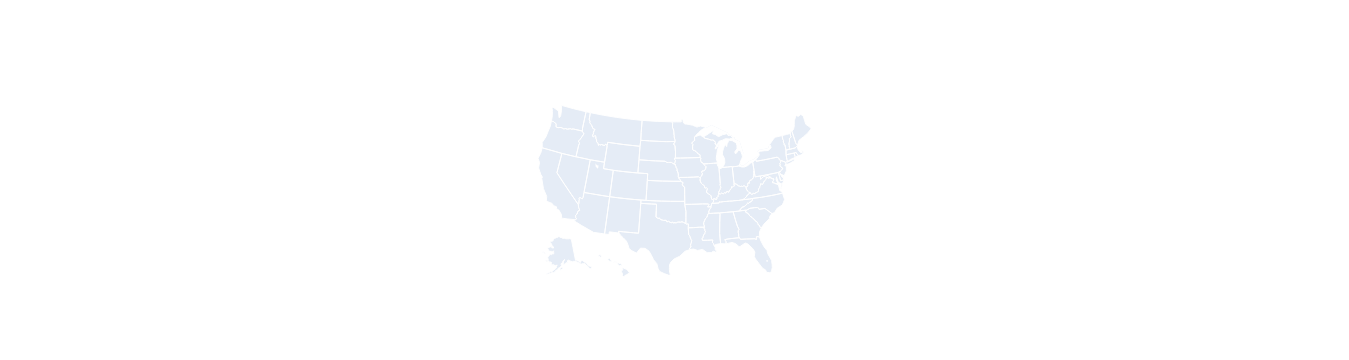

In [101]:
layout = dict(
    geo={"scope": "usa"}, coloraxis_colorbar=dict(title="Number of Schools")
)

data = dict(
    type="choropleth",
    locations=df["state"].value_counts().index,
    locationmode="USA-states",
    z=df["state"].value_counts().values,
    coloraxis="coloraxis",
)

x = pg.Figure(data=[data], layout=layout)

po.iplot(x)

#### We are missing a large amount of USA data due to omission. This is not evident by examining NaN values in the data set.

#### We could obtain this information from public records, but we will not do that here.

#### Not running these drops since there are major NaN issues with my data and I am missing the charter data due to issues with importing the csv.

In [ ]:
# df = df.dropna(subset=['average_act'])

In [ ]:
# df.isna().sum().to_frame(name='Number of Missing Values')

#### If we drop rows that have NaNs for any socioeconomic variables, then we will negatively affect our analysis using the variables where data were present. So, we will not drop the rows in this data set that are missing the socioeconomic variables. We will impute the missing values.

#### We set out-of-range values to NaN and will impute them.

#### We kept only high schools.

#### We removed schools where we do not have the ACT score.

#### Many schools are missing from the data by omission.

#### We will impute missing values of socioeconomic variables.



## Data Imputation

#### Define the predictor variables to be rate_unemployment, percent_college, percent_married, median_income, percent_lunch, state, and charter.

In [102]:
predictor_variables = [
    'rate_unemployment',
    'percent_college',
    'percent_married',
    'median_income',
    'percent_lunch',
    'state',
    'charter'
]

In [103]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [104]:
imputer = IterativeImputer()

### Fit the imputer using the numerical predictor variables (this can include dummies for categorical variables).

#### Define the columns you want to use in the imputation process

##### numerical_predictors = df[predictor_variables].select_dtypes(include='number').columns.to_list()

##### print(numerical_predictors) (Not running due to charter and csv issues that need to be resolved.

#### Fit the imputer

##### imputer.fit(df.loc[:, numerical_predictors])

#### Impute the missing data in the training data

###### df.loc[:, numerical_predictors] = imputer.transform(df.loc[:, numerical_predictors])

#### Check for missing values

##### df.isna().sum().to_frame(name='Number of Missing Values')

#### Export the clean dataset

###### df.to_csv(
    'education_clean.csv',
    encoding='utf-8-sig',
    index=False)

### Summary

#### We used an interative imputer to estimate missing values of numerical predictor variables

#### We saved the clean data frame as a csv file.

#### Note that this code is WIP due CSV issues.

##### df = pd.read_csv(https://raw.githubusercontent.com/CameronMangione/education/refs/heads/main/code/education_clean.csv)

##### df.head()

## Exploratory Data Analysis

### Examine distributions and relationships

predictor_variables = 'rate_unemployment', 'percent_college', 'percent_married', 'median_income','percent_lunch'

numerical_predictors = df[predictor_variables)/select_dtypes(include='number').columns_to_list()

corr_matrix = df[numerical_predictors+ [["average_act"]].corr()

plt.figure(figsize=(10,5))

sns.heatmap(corr_matrix, vmax=1, square=True, annot=True, cmap="viridis")

plt.tick_params(labelsize=12)

plt.show()

### Make pair plots to explore relationships between the variables

fig = sns.pairplot(
    edgap.drop(columns="NCESSCH School ID"),
    vars=numerical_predictors + ["average_act"),
    hue = "character",
    kind="reg",
    plot_kws={ 
        "scatter_kws": {"alpha": 0.5, "color": "k", "s": 7},
    },
)

for ax in fig.axes.flat:
    if ax.get_label() == 'CT Median Household Income':
        ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0)) #Apply scientific notation
    ax.set_xlabel(ax.get_xlabel(), fontsize=8, rotation=30, ha='right') #X-axis label size and rotation
    ax.set_ylabel(ax.get_ylabel(), fontsize=8) #Y-axis label size

    Rotate x-axis tick labels
    plt.step(ax.get_xticklabels(), rotation=30, ha='right')


plt.show()

sns.boxplot(data=df(fractions), color='k')

plt.ylabel('Proportion', fontsize=15)

plt.tick_params(labelsize=12)

plt.show()

### Summary

#### The numerical predictos are related to average_act. Relationship is roughly linear.

#### Numberical predictors are correlated with each other, suggesting not all predictors will be necessary.

#### Some variables have skewed distributions, suggesting transformations of input variables might be useful.

#### There are outliers in rate_unemployment, percent_college, percent_married and median_income, which reflect skewed distributions. a Log transformation to these predictors might be useful when exploring different models.

#### Relationships are similar across charter and non-charter schools,  but there could be significant difference regardless.